## Introduction to Python for Hydrology
## Session 3: Importing Data from Structured Data Files (Text, CSV, Excel)

Prepared by Brad Wolaver<br>
New Mexico Office of the State Engineer, Hydrology Bureau, Santa Fe, NM<br>
October 17, 2024 (Updated January 8, 2025)

## Objective
Learn how to import data from a text file and store it in a pandas DataFrame.<br>We’ll be playing with streamflow data from the [USGS Embudo gage](https://www.usgs.gov/news/state-news-release/first-usgs-streamgage-records-125-years-measuring-new-mexicos-vital-water), the oldest in the nation.

This session demonstrates reading a tab-delimited text file using pandas. The same approach can be adapted for CSV files, Excel files, or text files with different delimiters by modifying the `read_csv()` parameters:

- For CSV: `pd.read_csv('file.csv')`
- For Excel: `pd.read_excel('file.xlsx')`
- For other delimiters: `pd.read_csv('file.txt', sep='|')` # Replace | with desired delimiter

## Expected Outcomes
By the end of this session, you should be able to:
- Import tab-delimited USGS stream gage data files.
- Load data into a pandas DataFrame.
- Inspect the DataFrame using basic methods.
- Create a simple plot to visualize the data.
- Understand the basics of 0-based indexing in Python.

## Importing Necessary Libraries

In [1]:
# Import pandas for data manipulation
import pandas as pd

# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Enable inline plotting for Jupyter Notebook
# %matplotlib inline is a Jupyter magic command that configures matplotlib to display plots directly in the notebook
# This command is still useful in Jupyter, including newer versions, for consistent plot rendering
%matplotlib inline

## Reading the Data File

### Step 1: Read the File Into a pandas DataFrame

In [2]:
# Read the tab-delimited text file into a DataFrame
df = pd.read_csv('embudo_no_header.txt', sep='\t') # \t indicates that it is a tab-delimited file

# Display the first few rows to verify the data
print(df.head())

  agency_cd  site_no    datetime  99708_00060_00003 99708_00060_00003_cd
0      USGS  8279500  1889-01-01              398.0                    A
1      USGS  8279500  1889-01-02              385.0                    A
2      USGS  8279500  1889-01-03              395.0                    A
3      USGS  8279500  1889-01-04              400.0                    A
4      USGS  8279500  1889-01-05              413.0                    A


In [3]:
# Specify the number of rows you'd like to display
print(df.head(25))

   agency_cd  site_no    datetime  99708_00060_00003 99708_00060_00003_cd
0       USGS  8279500  1889-01-01              398.0                    A
1       USGS  8279500  1889-01-02              385.0                    A
2       USGS  8279500  1889-01-03              395.0                    A
3       USGS  8279500  1889-01-04              400.0                    A
4       USGS  8279500  1889-01-05              413.0                    A
5       USGS  8279500  1889-01-06              408.0                    A
6       USGS  8279500  1889-01-07              410.0                    A
7       USGS  8279500  1889-01-08              405.0                    A
8       USGS  8279500  1889-01-09              379.0                    A
9       USGS  8279500  1889-01-10              418.0                    A
10      USGS  8279500  1889-01-11              398.0                    A
11      USGS  8279500  1889-01-12              432.0                    A
12      USGS  8279500  1889-01-13     

### Step 2: Working with Dates in DataFrames

Inspect Data Types of Each Column in DataFrame `df`

In [4]:
print(df.dtypes)

agency_cd                object
site_no                   int64
datetime                 object
99708_00060_00003       float64
99708_00060_00003_cd     object
dtype: object


##### Converting 'datetime' Column to Datetime Objects

In the dataframe `df` pandas sees `datetime` as an object, which in this case is a string.  We need to Convert the `datetime` column from a string format to actual datetime objects.<br><br>
**Why do you need to convert the datetime format?**

This conversion is crucial for proper time series handling in pandas for several reasons:

1.	Enables time-based indexing and slicing of the DataFrame,
2.	Allows for time-based calculations and operations,
3.	Facilitates proper sorting and grouping by date and time, and
4.	Enables the use of time series-specific functions and methods in pandas.

The `pd.to_datetime()` function automatically detects common date and time formats, such as that used by the USGS. However, if your datetime strings are in an unusual format for some reason, you may need to specify the format explicitly using the `format` parameter.

After this conversion, you can perform various time-based operations on your data, such as resampling, time-based filtering, or calculating time differences, so the conversion is super important.

In [5]:
# Convert the 'datetime' column from string to datetime objects
df['datetime'] = pd.to_datetime(df['datetime'])

**Explanation** of the command `df['datetime']=pd.to_datetime(df['datetime'])`:

- `df`:  A DataFrame (a table-like data structure in pandas) which has a column called `datetime` containing dates stored as strings (text).
- `df['datetime']`: This refers to the `datetime` column in the DataFrame `df`.  It selects the column so we can work with it.
- `pd.to_datetime()`:
    - `pd` is short for pandas, a library in Python for working with data.
    - `to_datetime()` is a pandas function that converts strings representing dates (e.g., "1889-01-01") into actual datetime objects.  
    - Datetime objects are much easier to work with for tasks like sorting, filtering, or plotting by date. They allow Python to understand and manipulate the dates as actual points in time.
- Assignment  = : The equals sign is used to assign the result of the pd.to_datetime() conversion back to the datetime column in the DataFrame df.  

Now, verify that the conversion worked as expected by checking data types again

In [6]:
print(df.dtypes)

agency_cd                       object
site_no                          int64
datetime                datetime64[ns]
99708_00060_00003              float64
99708_00060_00003_cd            object
dtype: object


### Step 3: Set 'datetime' as the Index

In [7]:
# Display the first few rows to verify the data
print(df.head())

  agency_cd  site_no   datetime  99708_00060_00003 99708_00060_00003_cd
0      USGS  8279500 1889-01-01              398.0                    A
1      USGS  8279500 1889-01-02              385.0                    A
2      USGS  8279500 1889-01-03              395.0                    A
3      USGS  8279500 1889-01-04              400.0                    A
4      USGS  8279500 1889-01-05              413.0                    A


Notice that datetime is now a datetime object of the format `datetime64[ns]`.  The `ns` indicates that the datetime has nanosecond precision.  We don't need this level of precision, but we can still use this format for daily, monthly, or yearly analyses.

So, now we'll set the index of the dataframe as datetime so that we can de timeseries analyses with the dataframe.

You'll notice that the header now has one column on the left that does not have a title.  It starts with 0 and increments.  This is the index of the dataframe.  In the dataframe's current format, it does not know that each row of data is for a particular day -- only rows labeled 0, 1, 2, etc.

In [8]:
# Set 'datetime' as the index of the DataFrame
df = df.set_index('datetime')

In [9]:
# Display the first few rows to verify the data
print(df.head())

           agency_cd  site_no  99708_00060_00003 99708_00060_00003_cd
datetime                                                             
1889-01-01      USGS  8279500              398.0                    A
1889-01-02      USGS  8279500              385.0                    A
1889-01-03      USGS  8279500              395.0                    A
1889-01-04      USGS  8279500              400.0                    A
1889-01-05      USGS  8279500              413.0                    A


'datetime' is now the index of the DataFrame. It is not listed as a column anymore because pandas considers the index to be separate from the regular columns.

In [10]:
print(df.dtypes)

agency_cd                object
site_no                   int64
99708_00060_00003       float64
99708_00060_00003_cd     object
dtype: object


Checking the datatypes also shows that datatime is no longer one of the data rows of the dataframe, because it is the index.

Nov verify the index of the DataFrame in another way

In [11]:
# Check the index of the DataFrame
print(df.index)

DatetimeIndex(['1889-01-01', '1889-01-02', '1889-01-03', '1889-01-04',
               '1889-01-05', '1889-01-06', '1889-01-07', '1889-01-08',
               '1889-01-09', '1889-01-10',
               ...
               '2023-11-21', '2023-11-22', '2023-11-23', '2023-11-24',
               '2023-11-25', '2023-11-26', '2023-11-27', '2023-11-28',
               '2023-11-29', '2023-11-30'],
              dtype='datetime64[ns]', name='datetime', length=49276, freq=None)


**Here's a breakdown of what each part of the output means:**

1. `DatetimeIndex([...])`
   - `DatetimeIndex`: This tells you that the DataFrame’s index is now a DatetimeIndex, which means it is specifically designed to hold date and time values.
   - The list inside the brackets is truncated as indicated by the ellipsis (…), but it shows the actual date values in the index.  In this case, the index includes dates starting from '1889-01-01' and ending with '2023-11-30'.

2. `dtype='datetime64[ns]'`
   - `dtype='datetime64[ns]'`: This tells you the data type of the index. In this case, it is datetime64[ns], which means the dates are stored with nanosecond precision.

3. `name='datetime'`
   - `name='datetime'`: This confirms that the name of the index is 'datetime'.  This name comes from the column that was used to set the index, and it’s helpful for identifying or referencing the index in operations.


4. `length=49276`
   - length=49276: This tells you that there are 49,276 rows in your DataFrame, meaning the index has 49,276 distinct date entries.

5. `freq=None`
   - `freq=None`: This indicates that there is no regular frequency (like daily, weekly, or monthly) associated with the dates in the index.
   - If there were a regular frequency (e.g., one date per day), it might show something like freq='D' for daily data.  Since freq=None, it means the dates in the index may not follow a consistent interval, or pandas hasn’t detected a regular pattern.


**Usefulness of DatetimeIndex:**
   - Having a DatetimeIndex allows you to easily filter, slice, or group your data by time periods.
   - You can perform time-based operations like resampling (e.g., averaging monthly or yearly data) or selecting data from a specific range of dates.


In [12]:
print(df.tail())

           agency_cd  site_no  99708_00060_00003 99708_00060_00003_cd
datetime                                                             
2023-11-26      USGS  8279500              287.0                    P
2023-11-27      USGS  8279500              250.0                    P
2023-11-28      USGS  8279500              236.0                    P
2023-11-29      USGS  8279500              271.0                    P
2023-11-30      USGS  8279500              283.0                    P


## Inspecting the Data Using Summary Statistics

We can use the `describe` command to look at summary statistics of the dataframe, such as mean, standard deviation, min, and max. 

In [13]:
# Generate basic summary statistics
print(df.describe())

         site_no  99708_00060_00003
count    49276.0       45987.000000
mean   8279500.0         872.298171
std          0.0        1124.857367
min    8279500.0         130.000000
25%    8279500.0         362.000000
50%    8279500.0         525.000000
75%    8279500.0         794.000000
max    8279500.0       15900.000000


**Explanation of Each Statistic:**
    
1.	1site_no1 Column:
   - This column contains the site number (8279500), and in this case, it doesn’t vary (which is why the standard deviation is 0).  Since this value doesn't change, the summary statistics for this column are not very useful here.
   - Key takeaway: The site number is fixed (no variation).
2.	199708_00060_000031 Column (Streamflow in cfs):
   - This column represents streamflow data, so the summary statistics provide an insight into how the streamflow varies over time.
   - count (45987): This shows that there are 45,987 valid values in this column. This means some data might be missing (since the total row count is 49,276).
   - mean (872.30): This is the average streamflow value. It means that, on average, the streamflow over time is around 872 cubic feet per second (cfs).
   - std (Standard Deviation) (1124.86): This tells you how much the streamflow values vary from the mean. A high standard deviation (1124.86) indicates that streamflow values can be spread out over a wide range.
   - min (130.0): This is the minimum streamflow value recorded, meaning the lowest streamflow observed was 130 cfs.
   - 25% (1st Quartile) (362.0): This is the value below which 25% of the data falls. So, 25% of the time, streamflow was below 362 cfs.
   - 50% (Median or 2nd Quartile) (525.0): This is the median streamflow value. Half the values are below 525 cfs, and half are above. The median gives you a better idea of a typical streamflow value, especially when the data has extreme values (outliers).
   - 75% (3rd Quartile) (794.0): This is the value below which 75% of the data falls. So, 75% of the time, streamflow was below 794 cfs.
   - max (15900.0): This is the maximum streamflow value recorded, meaning the highest streamflow observed was 15,900 cfs.


**Key Takeaways:**
- 1df.describe()1 gives you an overview of your numeric data, helping you understand things like averages (mean), the spread (standard deviation), and extreme values (min, max).
- Streamflow data:
   - Most of the streamflow data is concentrated between 130 cfs and 15,900 cfs.
   - The average streamflow is 872 cfs, but there is a lot of variation, with the highest values being much larger.
- This summary helps identify trends, outliers, and how spread out the data is.  For example, if you're analyzing streamflow over time, knowing the median, average, and variation helps you understand typical conditions vs. extreme events.
- The summary statistics generated by df.describe() are very useful for getting a sense of your data’s distribution and variation. They help you quickly see the range of values (min, max), the typical value (mean, median), and how much the data varies (standard deviation).

## Checking for Missing Values

Look for missing values in the dataframe, which explains why `print(df.index)` results in `freq=None` and not `freq=D` which would be daily data (which we know we have).

In [14]:
# Check for missing values in each column
null_values = df.isnull()

# Sum the number of missing values per column
missing_values_count = null_values.sum()

# Display the count of missing values
print(missing_values_count)

agency_cd                  0
site_no                    0
99708_00060_00003       3289
99708_00060_00003_cd    3289
dtype: int64


There are 3289 days with missing data.  This can create gaps in your visualizations and may affect statistical analysis.  We'll ignor this for now, but you can decide to leave the missing values, remove the missing rows, or fill the missing values, depending on the importance of the missing data and the type of analysis or visualization you need.

## Plotting the Data

Using matplotlib we can create a simple line plot for a hydrograph to visualize the mean daily streamflow over time.  And sure enough, you can see that there are missing data towards the beginning of the streamflow record.

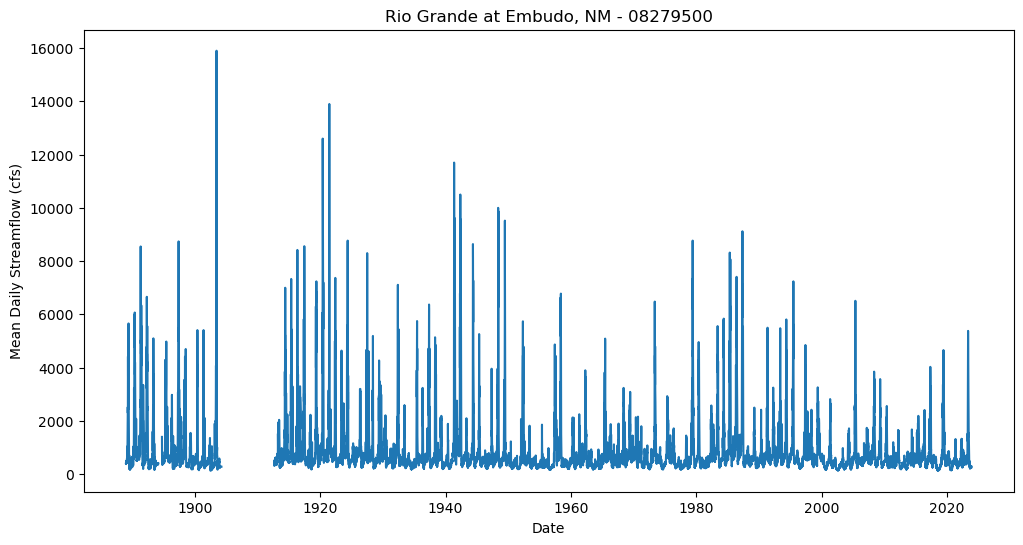

In [15]:
# Extract the streamflow data for clarity 
# and assign it to a variable called streamflow
streamflow = df['99708_00060_00003']

# Create a line plot of mean daily streamflow
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot the data
plt.plot(streamflow.index, streamflow, label='Embudo Streamflow (cfs)')

# Add title and labels
plt.title('Rio Grande at Embudo, NM - 08279500')
plt.xlabel('Date')
plt.ylabel('Mean Daily Streamflow (cfs)')

# Show legend
# plt.legend()

# Display the plot
plt.show()

You can see the missing data we discovered using `df.describe()` when we plot the data.  There are 3289 missing days, which is around 9 years.<br>Notice that the gap occurs after the largest flood in the record.  Maybe the gage was damaged? <br>Or perhaps funding issues limited the personnel and resources available for maintaining the gage network?

## Additional Resources

To learn more, you may want to refer to the official documentation for the key tools we used.
- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)